In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from scipy import stats # ANOVA
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import altair as alt
alt.renderers.enable('notebook') # enable altair rendering
import matplotlib.pyplot as plt # plotting (optional)
%matplotlib inline 

from datetime import datetime
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# NYC Parking Violations

## Problem Overview
According to the INRIX traffic congestion study, [New York City is one of the most congested cities in the world](http://inrix.com/scorecard/). Being that the city is the [10th most populated city in the world](https://www.worldatlas.com/citypops.htm), New York is one of the busiest cities in the world, and if you are a commuter in the big apple, you might find it extremely challenging to find parking in the city. It is such a challenge that parking applications has been in demand enough for multiple solutions to come out such as [SpotAngels](https://itunes.apple.com/us/app/spotangels-live-parking-maps/id897809583?mt=8&ign-mpt=uo%3D8), [ParkMobile](https://itunes.apple.com/us/app/parkmobile-find-parking/id365399299?mt=8&ign-mpt=uo%3D8), [SpotHero](https://itunes.apple.com/us/app/spothero-find-parking-nearby/id499097243?mt=8&ign-mpt=uo%3D8), and many more.

This project's problem revolves around the parking enforcement in New York City, mainly, the project explores how do factors such as color of the car, the make of the car, year of the car, location of parking, and more factors affect the probability of recieving a parking violation. The project relies on general domain knowledge and algorithmic selection of features to explore, while obviously it is impossible to come up with a perfect model, the project attempts to explore the relationships at play between different features and parking violations. 

## Implications
It is important to ask of any research question, why is it important? Looking at this problem on a surface-level, it is interesting to see how the color, make or year of a car affects the probability of recieving a parking violation. For those who regularly park in NYC, this might be helpful, and might be a bit sinister, to help evade parking laws. Diving into it a bit deeper, these results might lead to important discussions that challenge the current state. For example, if it discovered that a 1990 Impala is at a lot higher risk to recieve a violation than a 2018 Mercedes-Benz, what does that say about socioeconomic status and law enforcement? Are those at a lower socioeconomic status targeted by law enforcement? Apart from socioeconomics, if specific areas are at a higher risk than others, and these areas have a heavy concentration of minorities, some interesting conclusions can be drawn about race and law enforcement. The kind of car (year, make, color) says a lot about the owner, the features of a neighborhood (demographics) says a lot about its residents, and how these factors affect the probability of recieving a parking violation says a lot about society, and possible bias in law enforcement. This project has the potential of exploring possible police bias, which given the current and recent heavy activism mobilization over this subject, this is an issue that is deemed critical by society.

Straying away from political outcomes, the results of this dataset can be used as a helpful tool for NYC parking enforcement as well. Results might reveal trends that the enforcement office themselves may not be aware of, which allows officers to reflect over their work and perhaps focus on areas they were neglecting previously. In the perspective of the enforcement office, areas with high or low probabilities, for example, are interesting to explore for officers since it begs a question of causation. There could be a possible low or heavy police presence in areas, where the parking enforcement office can now work on improving and creating a more level-playing field. The results can be a powerful metric for officers to measure the quality of their work.

## The Dataset
The dataset stems from [Kaggle](https://www.kaggle.com/new-york-city/ny-parking-violations-issued), where the data was originally collected from New York City's [Open Data project](https://opendata.cityofnewyork.us). The dataset includes all of the parking violations in NYC recorded by the city, in the 2018 fiscal year. The dataset is, as one would imagine, huge, with almost 6 million rows initially, including the following initial features:
- Registration State
- Plate Type
- Issue Date
- Violation Code
- Vehicle Body Type
- Vehicle Make
- Issuing Agency
- Street Code1
- Street Code2
- Street Code3
- Vehicle Expiration Date
- Violation Location
- Violation Precinct
- Issuer Precinct
- Issuer Code
- Issuer Command
- Issuer Squad
- Violation Time
- Time First Observed
- Violation County
- Violation In Front Of Or Opposite
- House Number
- Street Name
- Intersecting Street
- Date First Observed
- Law Section
- Sub Division
- Violation Legal Code
- Days Parking In Effect
- From Hours In Effect
- To Hours In Effect
- Vehicle Color
- Unregistered Vehicle?
- Vehicle Year
- Meter Number
- Feet From Curb
- Violation Post Code
- Violation Description
- No Standing or Stopping Violation
- Hydrant Violation
- Double Parking Violation

Given that this is records collected from parking enforcement, it is not surprising the number of columns in this dataset, given that it is an extension of local government. The vast size of this dataset vertically and horizontally is great for modelling, it provides more than enough to explore important relationships, and potentially join with other tables of interest that can be used for modelling. 

Another positive aspect of the dataset is its credibility, being that this is raw data from the New York City's parking enforcement, there were no bias that can appear in the data collection process. This data comes directly from the source, and there are no questions over the ethics of the data and the process of collecting it, due to the validity of the dataset. One can be assured that no one's privacy was breached in achieving this dataset, and no bias can tamper with these values, as opposed to data conducted by research or a study where many biases can show up.

However, this dataset provides lots of challenges for anyone who attempts to tackle this issue, and many of the positives derived, can be spun into negatives. The size of the dataset not only makes computing time a lot slower, it also makes it a lot harder to clean up the data. Some normalization is needed to scale data for interpretation, such as accounting for population in each of the areas represented in the dataset, or only including the hour of when the violation occured, instead of the hours and minutes. There are multiple columns, such as 'Feet From Curb,' and 'Violation Post Code' which are mostly null or zero values that are rendered useless. While the data collection process is one of the brightest spots of this dataset, it provides lots of issues with consistency, as one can expect, there hundreads of New York City parking enforcement officers. There does not seem to be a standardized method of filling out violations records provided to the officers, as one look at the data can quickly indicate that there are multiple authors. One of the biggest issues in consistency can be seen in the 'Vehicle Color' column, where, for example, the color black is represented in values such as 'Black,' 'Blac,' 'Bla,' 'BL,' 'Bl,' and many more. Human error is a common theme in this dataset, not only in the vehicle color column, but in columns such as 'Issue Date,' referencing the date that specific parking violation was issued. Years such as 1990, 2020, and 2030 show up multiple times in this dataset, not only are these dates are not included in the 2018 fiscal year, it is obviously also impossible. This is a quite shocking discovery, given that this is dataset comes directly from a local government office, it is expected that it is accurate, especially when it comes to critical features such as the date of violation. This only emphasizes the importance of double checking every dataset, and taking extreme caution in the prepartion part of the analysis. Just because it is a local government office, does not mean it is impervious to mistakes.

Furthermore, similar to quality of the dataset, the bias of the dataset is an important point to bring up. As mentioned above, credibility is a huge positive of this dataset, society thinks of government data as hard and actual facts. However, this does not rid the dataset of possible bias, given that this data is collected by parking enforcement officers, they are humans with their own biases that can be carried into the dataset. Many officers may be allowing personal prejuidice affect how they carry their work, which is something that is touched on in the upcoming sections of this report. However, it is important to mention that this project does not try to predict the probability a vehicle has violated parking laws, instead, the project attempts to predict the probability of recieving a parking violation. This absolves the project results from the possible bias, since the project attempts to account for it in the models provided. If there is bias targeting minorities where they end up recieving more violations, for example, the model would be able to find areas of NYC with a high minority concentration and put them at a higher risk to recieve a violation.

Finally, possibly the biggest challenge of this dataset is that it is an all-true table, where only values that recieved a parking violation are included. This does not allow for statistical modelling or machine learning to be done since the machine is only being fed true values. There is no dataset that includes every single car that parked at any point in the 2018 fiscal year, so for anyone to tackle this issue, they are tasked with estimating a general population pool, which is how this project tackled this issue. When exploring how vehicle-specific features affect the probability of recieivng a parking violation, a dataset of all cars registered to the state of New York can be obtained and joined with this dataset, essentially creating a dataset of true and false values in terms of parking violations (some cars recieved, some did not). If one is pursuing area-specific features, borrough-level features for example, census data can be collected and used to normalize the data and create a general pool. Obviously, these are only estimates of the general pool, and not a complete picture of what is at hand. Not every car registered to the state of New York parks in NYC, nor does everyone that is represented in the census own a car or has parked in NYC during the fiscal year of 2018. However, these estimates are as close as the project can get to the general pool given the resources and time, given the nature of this problem, there is currently no way to truly achieve a complete general pool of data.

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('Data/parking-violations-issued-fiscal-year-2018.csv')

In [3]:
head = df.head(200)

In [6]:
head.columns
df.groupby('Plate ID').count().sort_values(by='Summons Number', ascending=False)

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
Plate ID,,,,,,,,,,,,,,,,,,,,,
BLANKPLATE,4313,4313,4313,4313,4313,3577,3703,4313,4313,4313,...,3666,2670,4313,2670,4313,1643,0,0,0,0
34914PC,734,734,734,734,734,732,732,734,734,734,...,732,48,734,48,734,685,1,0,0,0
2028685,636,636,636,636,636,633,636,636,636,636,...,631,38,636,38,636,598,0,0,0,0
2705138,609,609,609,609,609,606,607,609,609,609,...,605,39,609,39,609,570,0,0,0,0
47832MD,604,604,604,604,604,603,602,604,604,604,...,597,54,604,54,604,550,0,0,0,0
23189TC,561,561,561,561,561,548,554,561,561,561,...,546,68,561,68,561,493,0,0,0,0
2703208,555,555,555,555,555,550,552,555,555,555,...,552,44,555,44,555,511,0,0,0,0
14828MJ,543,543,543,543,543,542,540,543,543,543,...,541,68,543,68,543,475,0,0,0,0
AT462E,541,541,541,541,541,538,539,541,541,541,...,539,14,541,15,541,527,0,0,0,0


In [15]:
df.loc[df['Plate ID'] == '2028685']["Street Name"]

386953        8TH AVE
387071          7 AVE
387072          7 AVE
387073          7 AVE
398817     6TH AVENUE
402547        W 55 ST
411647        W 50 ST
411648        W 50 ST
411755        8TH AVE
411997        W 56 ST
411998        W 50 ST
467891        6th Ave
467892        6th Ave
469376      W 55th St
470707        7th Ave
471139      W 50th St
471140      W 50th St
471973        6th Ave
471974        6th Ave
472036      E 52nd St
472037      E 52nd St
472995        6th Ave
472996        6th Ave
473005       Broadway
473006       Broadway
475767      W 50th St
475768      W 50th St
478130        6th Ave
478131        6th Ave
478293      W 56th St
              ...    
5673348       6th Ave
5680243       6th Ave
5680244       6th Ave
5680280       6th Ave
5680281       6th Ave
5682043       6th Ave
5682044       6th Ave
5682068     W 56th St
5682069     W 56th St
5682120     W 54th St
5720522       6th Ave
5720523       6th Ave
5722333       6th Ave
5722334       6th Ave
5738926   

In [6]:
vehicles = head["Vehicle Make"].dropna()

Text(0, 0.5, 'Vehicle make name')

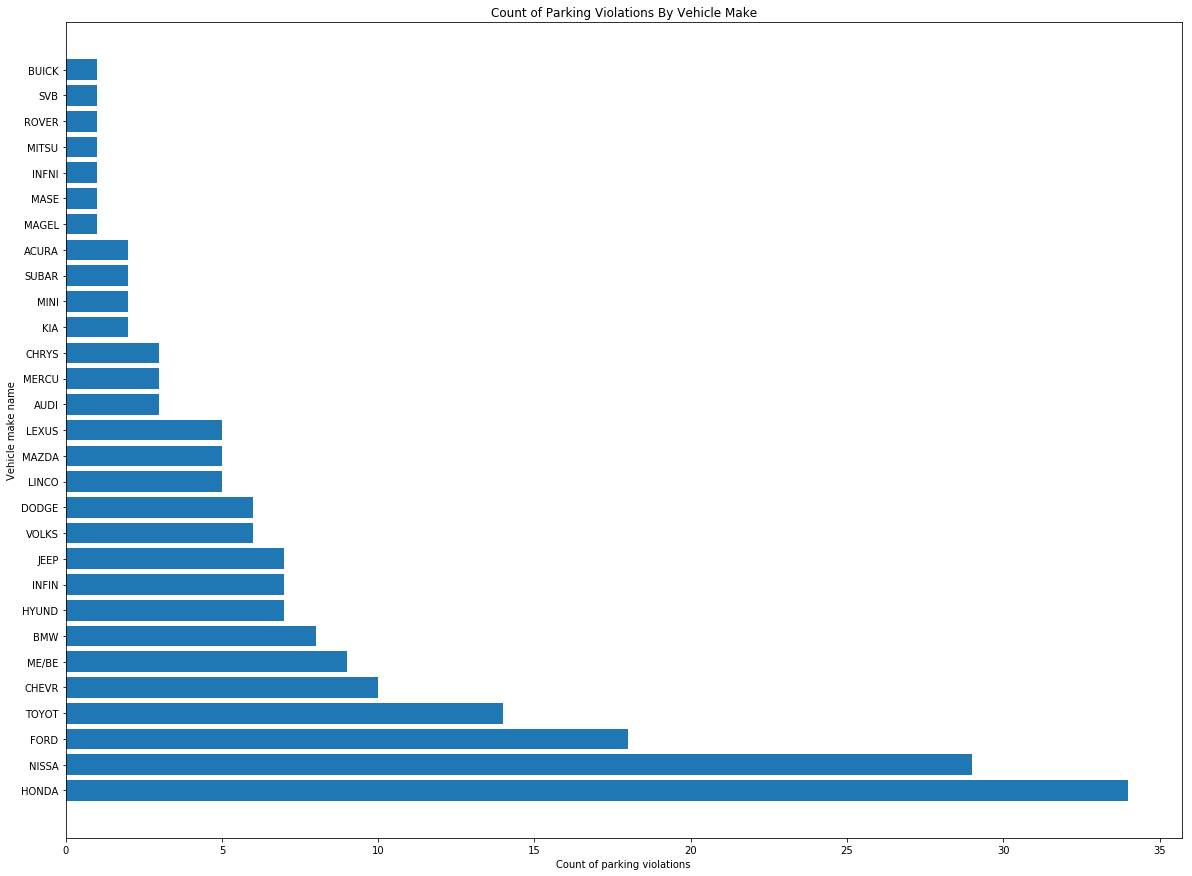

In [7]:
vehicles = pd.DataFrame(data={'Make': vehicles.groupby(vehicles).count().index, 'Count':vehicles.groupby(vehicles).count()})
vehicles = vehicles.sort_values('Count', ascending=False)
plt.figure(figsize=(20, 15))
plt.barh(vehicles['Make'], vehicles['Count'])
plt.title("Count of Parking Violations By Vehicle Make")
plt.xlabel("Count of parking violations")
plt.ylabel("Vehicle make name")

Text(0, 0.5, 'Color name')

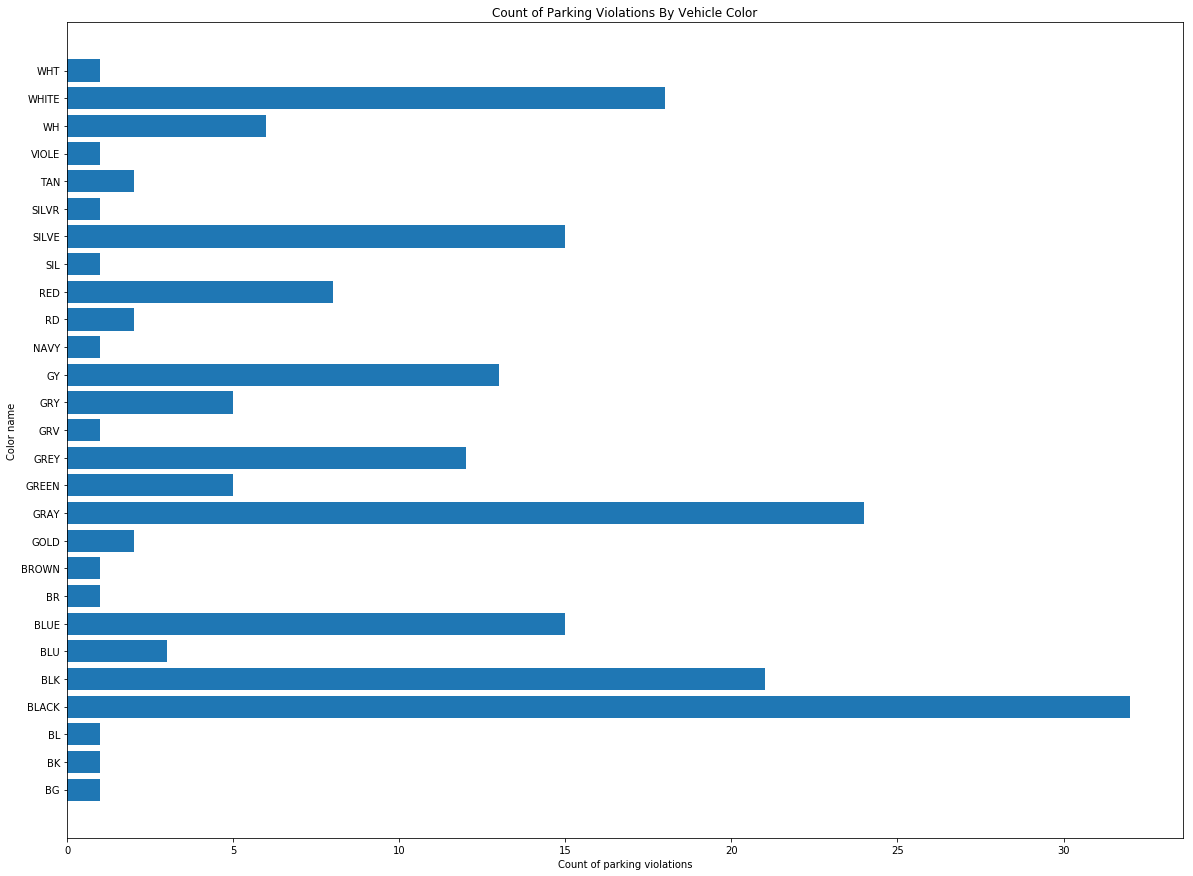

In [8]:
colors = head["Vehicle Color"].dropna()
colors.groupby(colors).count()
plt.figure(figsize=(20, 15))
plt.barh(colors.groupby(colors).count().index, colors.groupby(colors).count())
plt.title("Count of Parking Violations By Vehicle Color")
plt.xlabel("Count of parking violations")
plt.ylabel("Color name")

Text(0, 0.5, 'Count of parking violations')

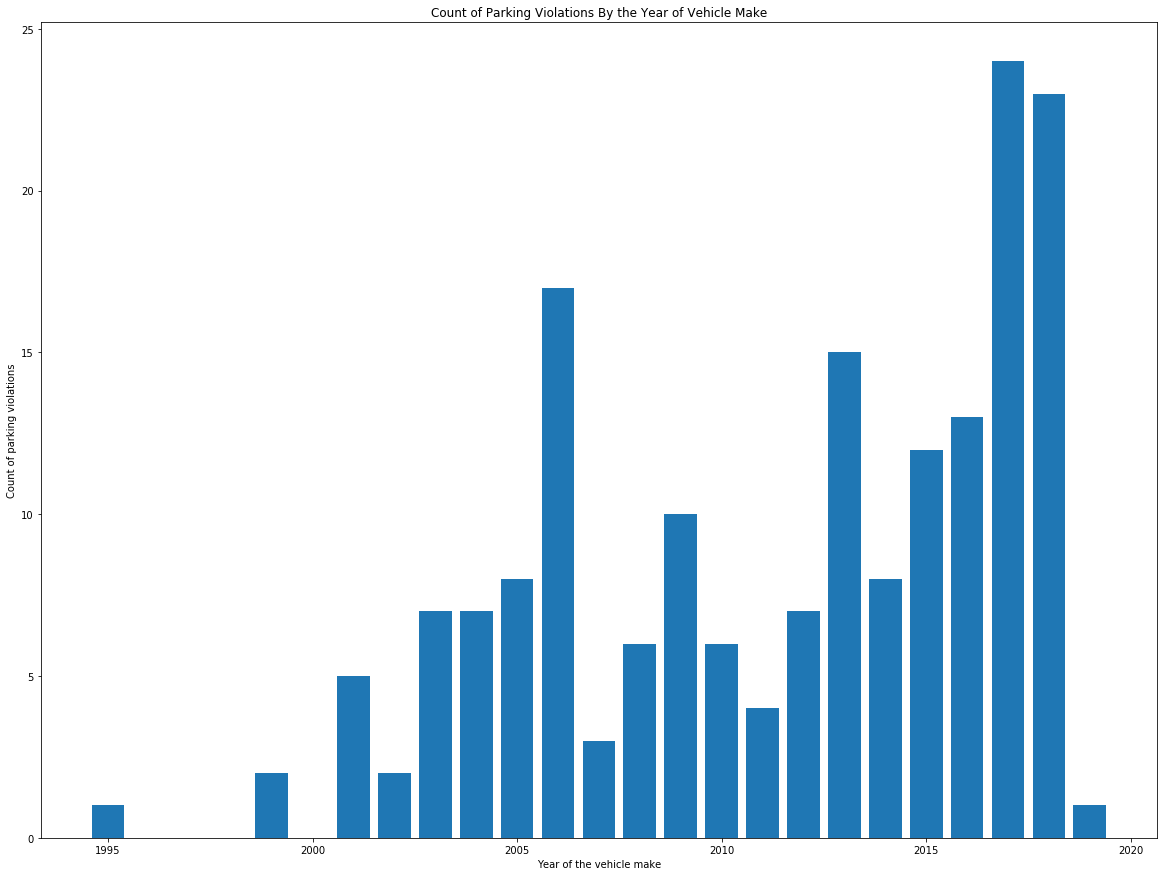

In [9]:
year = head["Vehicle Year"].dropna()
year = year[year != 0]
year.groupby(year).count()
plt.figure(figsize=(20, 15))
plt.bar(year.groupby(year).count().index, year.groupby(year).count())
plt.title("Count of Parking Violations By the Year of Vehicle Make")
plt.xlabel("Year of the vehicle make")
plt.ylabel("Count of parking violations")


In [10]:
manhattan = len(head.loc[head['Violation Precinct'] < 35]) / 22.83
bronx = len(head[(head['Violation Precinct'] > 34) & (head['Violation Precinct'] < 53)]) / 42.10
brooklyn = len(head[(head['Violation Precinct'] > 52) & (head['Violation Precinct'] < 95)]) / 70.82
queens = len(head[(head['Violation Precinct'] > 94) & (head['Violation Precinct'] < 116)]) / 108.53	
staten_island = len(head.loc[head['Violation Precinct'] > 115]) / 58.37

In [11]:
p = pd.DataFrame(data={'Precincts':['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'], 'Count': [manhattan, bronx, brooklyn, queens, staten_island]})

Text(0, 0.5, 'Borough name')

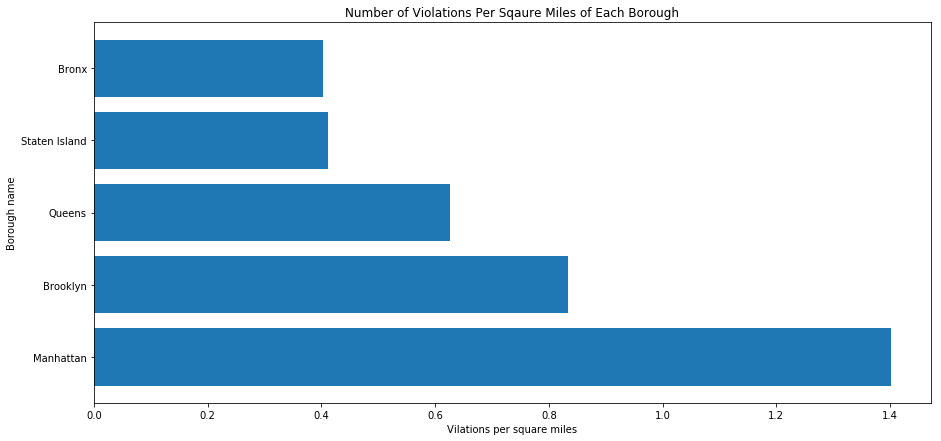

In [12]:
p = p.sort_values('Count', ascending=False)
plt.figure(figsize=(15, 7))
plt.barh(p['Precincts'], p['Count'])
plt.title("Number of Violations Per Sqaure Miles of Each Borough")
plt.xlabel("Vilations per square miles")
plt.ylabel("Borough name")

In [13]:
def convert_to_datetime(x):
    mid = int(len(x) / 2)
    hrs = int(x[0:mid])
    if (x[len(x) - 1] == 'P' or x[len(x) - 1] == 'A'):
        mins = int(x[mid:len(x) - 1])
        is_pm = x[len(x) - 1] == 'P'
    else:
        mins = int(x[mid:len(x)])
        is_pm = False
    if (is_pm):
        hrs = hrs + 12
    return hrs

In [14]:
head['Violation Time'] = head['Violation Time'].dropna().apply(lambda x: convert_to_datetime(x))

Text(0, 0.5, 'Count of parking violations')

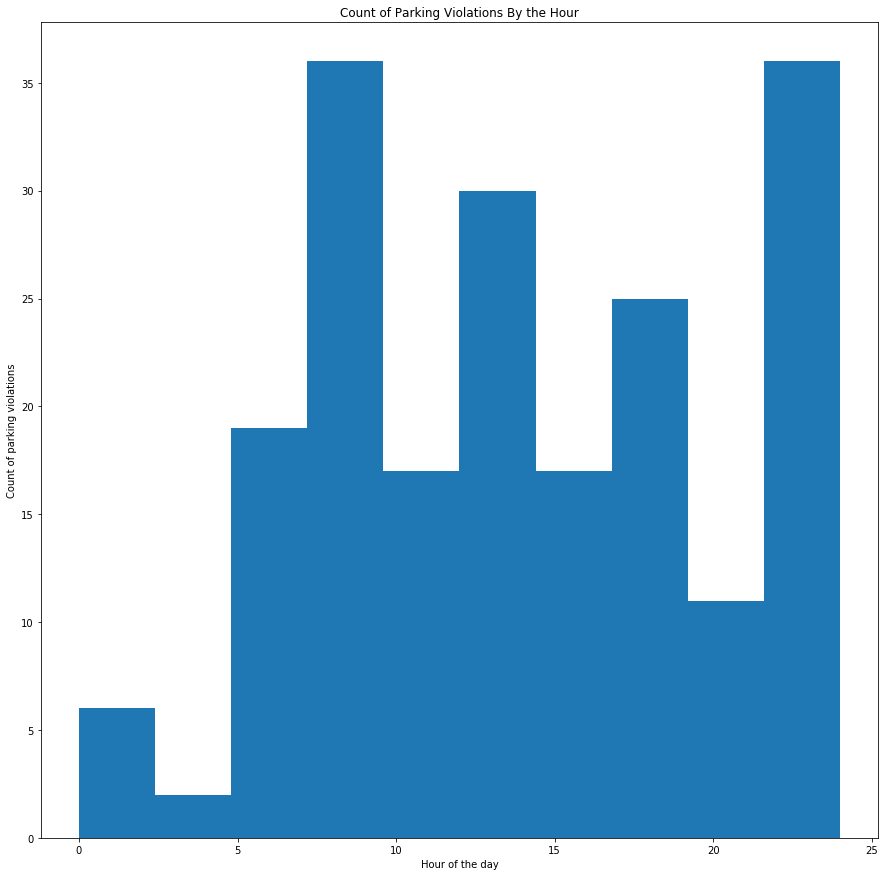

In [15]:
plt.figure(figsize=(15, 15))
plt.hist(head['Violation Time'])
plt.title("Count of Parking Violations By the Hour")
plt.xlabel("Hour of the day")
plt.ylabel("Count of parking violations")

In [16]:
def convert_to_date(x):
    print(x)
    return datetime.strptime(x[0:7], '%Y-%m')

In [17]:
head["Issue Date"] = head["Issue Date"].dropna().apply(lambda x: convert_to_date(x))

2018-07-03T00:00:00.000
2018-06-28T00:00:00.000
2018-06-08T00:00:00.000
2018-06-07T00:00:00.000
2018-06-29T00:00:00.000
2018-07-02T00:00:00.000
2018-07-02T00:00:00.000
2018-07-02T00:00:00.000
2019-07-02T00:00:00.000
2018-07-02T00:00:00.000
2018-05-31T00:00:00.000
2018-07-02T00:00:00.000
2018-07-02T00:00:00.000
2018-07-06T00:00:00.000
2018-06-27T00:00:00.000
2018-07-20T00:00:00.000
2018-07-20T00:00:00.000
2018-07-20T00:00:00.000
2018-07-13T00:00:00.000
2018-07-13T00:00:00.000
2018-06-23T00:00:00.000
2018-07-07T00:00:00.000
2018-06-18T00:00:00.000
2018-06-18T00:00:00.000
2018-06-18T00:00:00.000
2018-07-15T00:00:00.000
2018-06-05T00:00:00.000
2018-06-20T00:00:00.000
2018-06-26T00:00:00.000
2018-07-02T00:00:00.000
2018-06-29T00:00:00.000
2018-07-12T00:00:00.000
2018-07-12T00:00:00.000
2018-07-13T00:00:00.000
2018-07-13T00:00:00.000
2018-06-18T00:00:00.000
2018-06-26T00:00:00.000
2018-05-31T00:00:00.000
2018-06-21T00:00:00.000
2018-07-02T00:00:00.000
2018-06-24T00:00:00.000
2018-06-15T00:00

(array([ 15., 184.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([736785. , 736830.6, 736876.2, 736921.8, 736967.4, 737013. ,
        737058.6, 737104.2, 737149.8, 737195.4, 737241. ]),
 <a list of 10 Patch objects>)

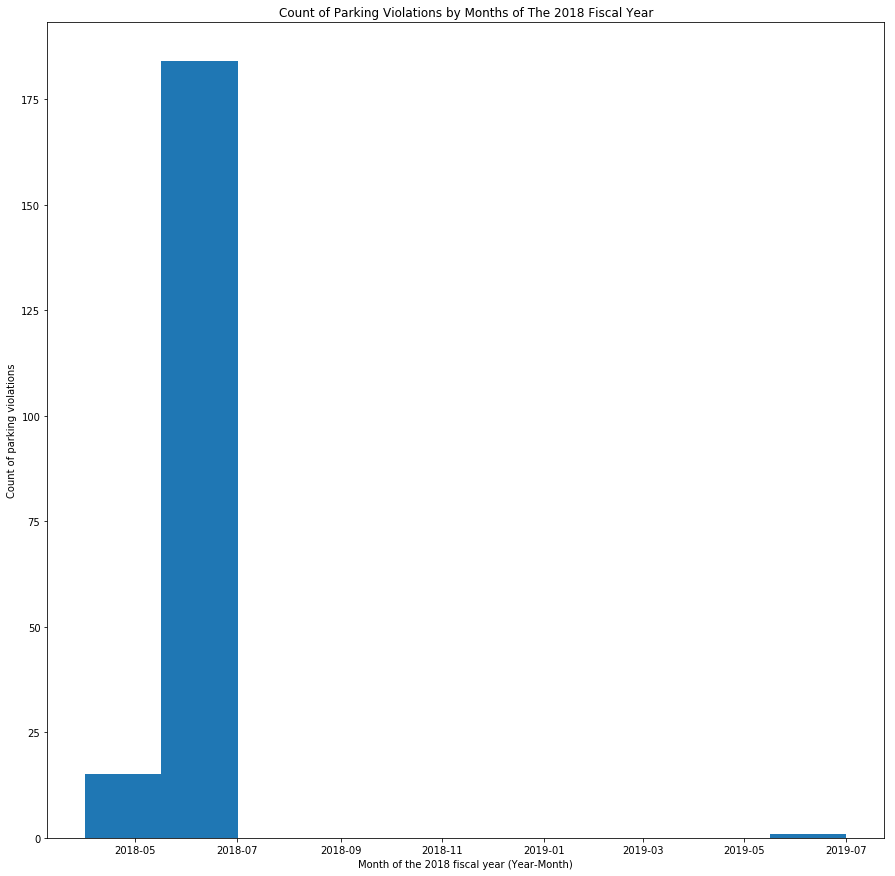

In [18]:
plt.figure(figsize=(15,15))
plt.title("Count of Parking Violations by Months of The 2018 Fiscal Year")
plt.xlabel("Month of the 2018 fiscal year (Year-Month)")
plt.ylabel("Count of parking violations")
plt.hist(head["Issue Date"])

In [23]:
head[["Issue Date", 'Days Parking In Effect    ']]

,Issue Date,Days Parking In Effect
0,2018-07-03T00:00:00.000,BBYBBBB
1,2018-06-28T00:00:00.000,BBBBBBB
2,2018-06-08T00:00:00.000,BBBBBBB
3,2018-06-07T00:00:00.000,BBBBBBB
4,2018-06-29T00:00:00.000,BBBBBBB
5,2018-07-02T00:00:00.000,BBBBBBB
6,2018-07-02T00:00:00.000,YBBYBBB
7,2018-07-02T00:00:00.000,YBBYBBB
8,2019-07-02T00:00:00.000,YBBYBBB
9,2018-07-02T00:00:00.000,YYYYYYB


## Data Analysis

In [4]:
import numpy as np
import pandas as pd

import pydotplus
from sklearn import tree
import collections

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # typically done at the start
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [6]:
small_df = pd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2018.csv', usecols=  ['Summons Number', 'Registration State', 'Plate Type',
       'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Violation Time', 'Violation County', 'Street Name','Law Section',
       'Sub Division', 'Vehicle Year', 'Feet From Curb'], index_col='Summons Number', nrows = 100000)

In [7]:
small_df = small_df.dropna()                      
def convert_to_hours(x):
   mid = int(len(x) / 2)
   hrs = int(x[0:mid])
   if (x[len(x) - 1] == 'P' or x[len(x) - 1] == 'A'):
       mins = int(x[mid:len(x) - 1])
       is_pm = x[len(x) - 1] == 'P'
   else:
       mins = int(x[mid:len(x)])
       is_pm = False
   if (is_pm):
       hrs = hrs + 12
   return hrs

small_df['Violation Time'] = small_df['Violation Time'].dropna().apply(lambda x: convert_to_hours(x))

### Predicting type of parking violation
Since we only have data about vehicles that have violated parking laws in NYC, the question we are now looking to answer is:  
Can we predict the type of violation committed by a vehicle based on it's Registration State, Plate Type, Vehicle Body Type, Vehicle Make,Issuing Agency, Violation Time, Violation County, Street Name, Law Section, Sub Division, Vehicle Year and Feet From Curb. 

### Creating Dummy variables for categorical data
The dataset we are using consists mostly of categorical data and conducting statistical analysis on categorical data is difficult and inefficent becasue it proposes various challenges and limitations. Text is hard to compare since there is no inherent structure or numeric attributes that define and rank some of the categories. Therefore we created dummy variables for each unique value in each category so it contains binary representation (either it belongs in that subcategory or not). The following kernels of code perform Hot Encoding of the categorical variables and joins them to the dataset. 


In [8]:
one_hot = pd.get_dummies(small_df['Registration State'])
one_hot.columns = ['Reg_State_' + str(col) for col in one_hot.columns]

small_df.drop(columns=['Registration State'],inplace=True)

small_df = small_df.join(one_hot)


In [9]:
one_hot_pl_type = pd.get_dummies(small_df['Plate Type'])
one_hot_pl_type.columns = ['plate_type_' + str(col) for col in one_hot_pl_type.columns]

small_df.drop(columns=['Plate Type'],inplace=True)

small_df = small_df.join(one_hot_pl_type)


In [10]:
one_hot_v_body_type = pd.get_dummies(small_df['Vehicle Body Type'])
one_hot_v_body_type.columns = ['v_body_type_' + str(col) for col in one_hot_v_body_type.columns]

small_df.drop(columns=['Vehicle Body Type'],inplace=True)

small_df = small_df.join(one_hot_v_body_type)



In [11]:
one_hot_v_make = pd.get_dummies(small_df['Vehicle Make'])
one_hot_v_make.columns = ['v_make_' + str(col) for col in one_hot_v_make.columns]

small_df.drop(columns=['Vehicle Make'],inplace=True)

small_df = small_df.join(one_hot_v_make)


In [12]:
one_hot_issuing_agency = pd.get_dummies(small_df['Issuing Agency'])
one_hot_issuing_agency.columns = ['issuing_agency_' + str(col) for col in one_hot_issuing_agency.columns]

small_df.drop(columns=['Issuing Agency'],inplace=True)

small_df = small_df.join(one_hot_issuing_agency)


In [13]:
one_hot_sub_div = pd.get_dummies(small_df['Sub Division'])
one_hot_sub_div.columns = ['sub_div_' + str(col) for col in one_hot_sub_div.columns]

small_df.drop(columns=['Sub Division'],inplace=True)

small_df = small_df.join(one_hot_sub_div)


In [14]:
one_hot_vio_cty = pd.get_dummies(small_df['Violation County'])
one_hot_vio_cty.columns = ['vio_cty_' + str(col) for col in one_hot_vio_cty.columns]

small_df.drop(columns=['Violation County'],inplace=True)

small_df = small_df.join(one_hot_vio_cty)


In [15]:
one_hot_street_name = pd.get_dummies(small_df['Street Name'])
one_hot_street_name.columns = ['strt_name_' + str(col) for col in one_hot_street_name.columns]

small_df.drop(columns=['Street Name'],inplace=True)

small_df = small_df.join(one_hot_street_name)



### Decision Trees
After encoding the data, we create decision trees based on all of our independent variables mentioned in the question above. 
We are using decision trees here because it is fast. We have a lot of data and a lost 5000 columns becasue of hot encoding the data. Most ML methods take an exponentially large time becasue of the size of the data set. Additionally, Decision trees are easy to interpret and visualize.It can easily capture Non-linear patterns. The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. [Source](https://scikit-learn.org/stable/modules/tree.html)
However, DTs also tend to overfit the data. Since we have so many columns and the categories are so varied, there is a lot of noise created, detracting us from accurately predicting type of parking violation.   
  
Although we only created the decision trees for a sample of the data, we noticed that as the data got bigger, the accuraccy score also got bigger. This may be becasue we are introducing additional columns becasue there might be new values of categories, adding to additional columns. However the updward trend suggests that a higher number of cases studied improves accuracy.  

In [16]:
train_features, test_features, train_outcome, test_outcome = train_test_split(
   small_df.drop(columns=['Violation Code']),      # features
   small_df['Violation Code'],    # outcome
   test_size=0.30 # percentage of data to use as the test set
)

In [20]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_features, train_outcome)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
accuracy = accuracy_score(tree_clf.predict(test_features), test_outcome)
accuracy

0.9196314048470937

### KNN 
K Nearest neighbors takes an exceptionally long time to run since it has to cross validate the data and perform a grid search to find the best value of K. We were unable to compile the code becasue of memory errors and time it took to run the method. 

In [ ]:
# pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier())

# param_grid = {'kneighborsclassifier__n_neighbors': range(1,20), 'kneighborsclassifier__weights':["uniform", "distance"]}
# grid = GridSearchCV(pipe)
# grid.fit(train_features, train_outcome)
# grid.score(test_features, test_outcome)